<a href="https://colab.research.google.com/github/SandeepJosyula/NeuralNetworks/blob/master/SJ_NeuralNetworks_Project_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks Project**
## The Problem 

**Description:** Recognizing multi-digit numbers in photographs captured at street level is an importantcomponent of modern-day map making. A classic example of a corpus of such streetlevel photographs is Google’s StreetView imagery comprised of hundreds of millions ofgeo-located 360 degree panoramic images. The ability to automatically transcribe anaddress number from a geo-located patch of pixels and associate the transcribednumber with a known street address helps pinpoint, with a high degree of accuracy, thelocation of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the opticalcharacter recognition community. While OCR on constrained domains like documentprocessing is well studied, arbitrary multi-character text recognition in photographs isstill highly challenging. This difficulty arises due to the wide variability in the visualappearance of text in the wild on account of a large range of fonts, colours, styles,orientations, and character arrangements. The recognition problem is furthercomplicated by environmental factors such as lighting, shadows, secularities, andocclusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project we will use dataset with images centred around a single digit (many of theimages do contain some distractors at the sides). Although we are taking a sample ofthe data which is simpler, it is more complex than MNIST because of the distractors.

**Data Description:** 
The Street View House Numbers (SVHN) DatasetSVHN is a real-world image dataset for developing machine learning and objectrecognition algorithms with minimal requirement on data formatting but comes from asignificantly harder, unsolved, real world problem (recognizing digits and numbers innatural scene images). SVHN is obtained from house numbers in Google Street Viewimages.

**Link to the dataset:** https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

Acknowledgement for the datasets.Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. NgReading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshopon Deep Learning and Unsupervised Feature Learning 2011. PDFhttp://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

##Objective:
The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows: 

**Steps and tasks**
1.Load Dataset
2.Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
3.Data fetching and understand the train/val/test splits. (15points)
4.Implement and apply a deep neural network classifier including (feedforward neuralnetwork, RELU, activations) (25points) 
5.Implement batch normalization for training the neural network(10points) 
6.Print the classification accuracy metrics (10points) 

*Hint: refer the following code to load data set, if required*


# **Implementation**

## Import Libraries


In [56]:
import h5py
import numpy as np
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten

## Read data and extract required datasets


In [57]:
# Open the file as read only
h5f = h5py.File( '/content/drive/My Drive/Study/ML & AI - Study/Colab Notebooks/Neural Networks/SVHN_single_grey1.h5', mode='r')
list(h5f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [58]:
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]
X_val = h5f['X_val'][:]
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]
y_val = h5f['y_val'][:]
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)
print('X_val shape: ',X_val.shape)
print('y_val shape: ',y_val.shape)
h5f.close()

X_train shape:  (42000, 32, 32)
X_test shape:  (18000, 32, 32)
y_train shape:  (42000,)
y_test shape:  (18000,)
X_val shape:  (60000, 32, 32)
y_val shape:  (60000,)


## Data Pre-processing

### Flatten the images for Keras	

In [72]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape( (X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

print(X_train.shape, X_test.shape, X_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024)


### Normalize the inputs for X_train, X_test and X_val	

### Convert the class matrices y_train, y_test and y_val into one hot vectors	

In [75]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train.shape, y_test.shape, y_val.shape)

(42000, 10) (18000, 10) (60000, 10)


### Print the train, test and val shapes	

In [52]:
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


### Visualize the first 10 images in X_train and the corresponding Y_train labels	

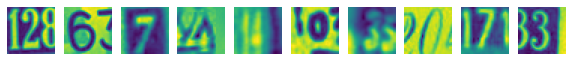

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [74]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32))  # For gray scale, use the argument cmap="gray"
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## In the train and test loop, define the hyperparameters for the model	

## Create a Sequential model in Keras with input layer with the correct input shape, Hidden Layers, Output Layers and the activation functions	


## Define the optimizer to be used in this model	

## Compile the model with the corresponding Loss and metrics to monitor	


## Fit the model and use model.evaluate() to return the score	

## Disable Regularization by setting appropriate value for Lambda and check the loss of the NN	

## Increase the Regularization parameter (Lambda) and check how the loss is for the NN. Record findings	

## Network overfit with a small subset of the dataset. Check if the network will overfit when you use no regularization and the loss is very small and accuracy is 100%.	

## Load the original dataset with all the images and prepare the data for modelling	

## Start with a small Regularization. Keep adjusting the learning rate to check the loss. Record findings	

## Perform Hyperparameter Optimization . Record findings	

## Run a finer search by using a finer range of the hyperparameter. Record findings	

## Set the best hyperparameters found in the previous step. Check the Network’s accuracy.	